## Tutorial #3: Baseline Correction

As EEG is a time-resolving signal, it may often have temporal drifts which are unrelated to our experimental question. Various internal and external sources may cause temporal drifts, which change over time, and also across electrodes.
To reduce the effect of such drifts, it is custom to perform a so-called baseline correction. Essentially, this consists of using EEG activity over a baseline period, i.e. before an external event occurs, to correct activity over a post-stimulus interval, i.e. the time after an external event occurs.
Various approaches exist for baseline correction. The traditional way is subtracting the mean of a baseline period from every time point of the baseline and post-stimulus interval. In other words, the average voltage values of each electrode are calculated within a time interval and then this average is substracted from that time interval of the signal.

### Baseline Correction In Practice:

#### 1.) Baseline Correction with MNE
To apply baseline correction in MNE, a time interval should be passed as a paramenter to apply_baseline() function of epochs object. If 'None' is given as time interval, baseline correction will not be applied. To apply baseline correction to the all time interval, (None,None) should be used. This function returns baseline-corrected epochs object and note that it modifies the object as well. 

In [50]:
import mne
import mne.viz
import numpy as np
%matplotlib inline

In [51]:
#Load epoched data
data_file = '../datasets/817_1_PDDys_ODDBALL_Clean_curated-epo'
# Read the EEG epochs:
epochs = mne.read_epochs(data_file + '.fif')

Reading ../datasets/817_1_PDDys_ODDBALL_Clean_curated-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


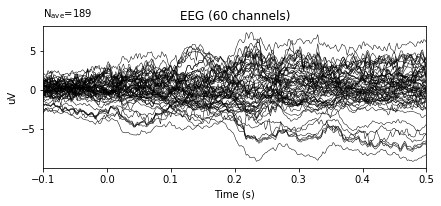

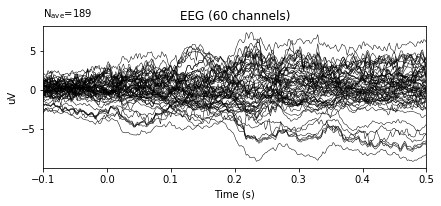

In [52]:
# Plot of initial evoked object
epochs.average().plot()

As mentioned before, the initial signal will be modified by baseline correction. If you want to keep the initial epoch object without any change it should be copied to another variable before calling apply_baseline() function. Otherwise it will be lost. In python, shallow copies can be modified when the original object is modified. However, deep copies are independent from the original object. So, in our case we need a deep copy of epochs object.

Applying baseline correction (mode: mean)


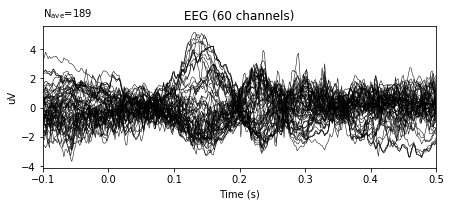

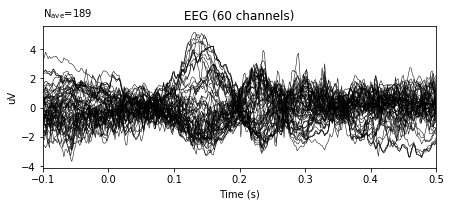

In [54]:
import copy
epochs_wo_bc = copy.deepcopy(epochs)
# baseline correction
bc_epochs = epochs.apply_baseline((None,None))

# Plot of baseline-corrected evoked signal
bc_epochs.average().plot()

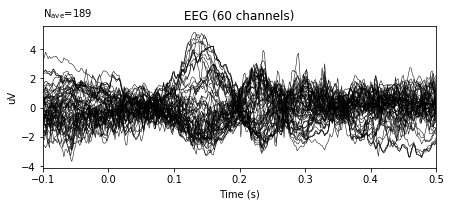

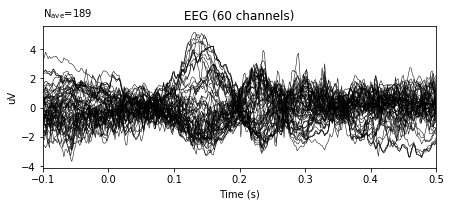

In [55]:
#Modified evoked object
epochs.average().plot()

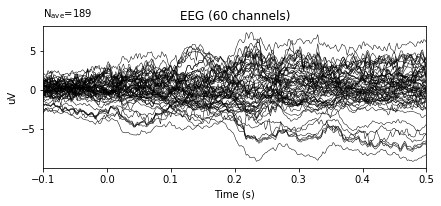

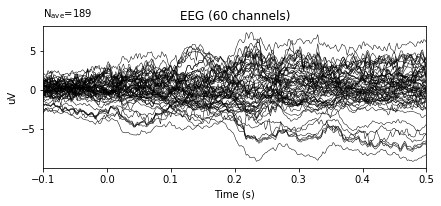

In [56]:
epochs_wo_bc.average().plot()

In the example above, the variance in the amplitudes of given signal decreased significantly.  

Alternatively a similar observation can be made via plots that show single trials and the average as in the plots below. In these plots black line represents the average and the rest is single trials. 

Note that these plots are drawn by using Matplotlib library of Python.

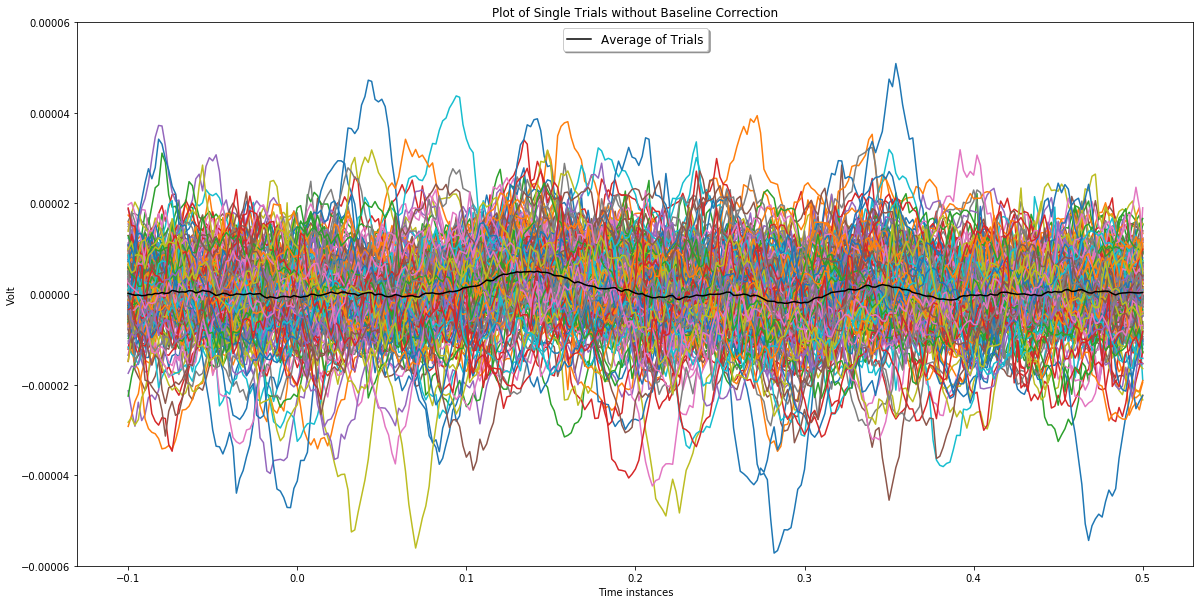

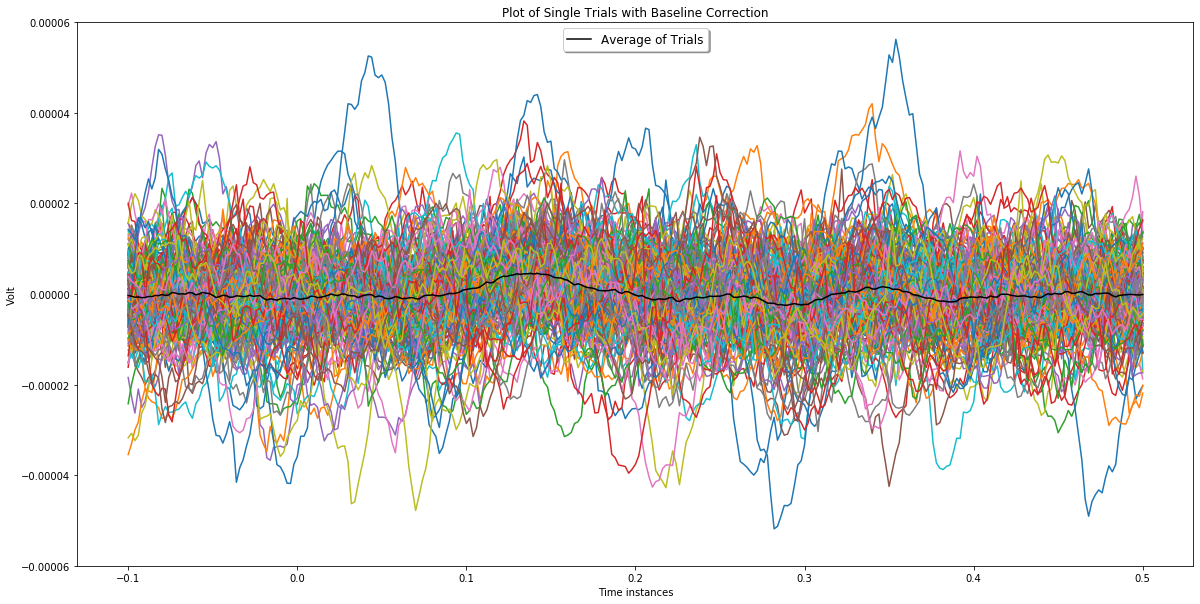

In [100]:
from matplotlib import pyplot as plt
%matplotlib inline
ch = 47 # channel index
data_types = ['original', 'bc']

for i in range(len(data_types)):

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlabel('Time instances')
    ax.set_ylabel('Volt')
    plt.ylim(-0.00006, 0.00006) 
    if data_types[i] == 'bc': 
        plt.title('Plot of Single Trials with Baseline Correction')
        for i in range(len(bc_epochs.get_data())):   
            ax.plot(bc_epochs.times, bc_epochs.get_data()[i,ch,:])
        ax.plot(bc_epochs.average().times, bc_epochs.average().data[ch,:], color='black', label='Average of Trials')
    
    else:
        plt.title('Plot of Single Trials without Baseline Correction')
        for i in range(len(epochs_wo_bc.get_data())):   
            ax.plot(epochs_wo_bc.times, epochs_wo_bc.get_data()[i,ch,:])
        ax.plot(epochs_wo_bc.average().times, epochs_wo_bc.average().data[ch,:], color='black', label='Average of Trials')

    legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
    plt.show()

In [113]:
bc_epochs.get_data()[60,47,:]

array([-8.66640760e-06, -1.11895151e-05, -1.56285038e-05, -1.45223312e-05,
       -1.36212387e-05, -1.49655905e-05, -1.49500465e-05, -1.21276627e-05,
       -7.71383096e-06, -6.17657616e-06, -6.57665493e-06, -1.98318234e-06,
       -7.39627200e-07, -2.42615093e-08,  2.04268618e-06, -2.45493641e-06,
       -2.68659857e-06, -1.75833604e-06, -1.91081777e-06, -2.97982886e-06,
       -3.53845933e-06, -1.96344438e-06, -1.88066295e-06, -1.68580368e-06,
        2.34102722e-06, -2.63633075e-06, -5.43692829e-06, -2.07279316e-06,
        9.00875055e-07,  6.82555193e-06,  1.46898412e-05,  1.45854491e-05,
        7.24647898e-06,  9.48160166e-06,  9.14364714e-06,  9.10733885e-06,
        1.23772497e-05,  1.10201835e-05,  1.15299205e-05,  9.17523951e-06,
        1.02094955e-05,  1.22775535e-05,  1.45241803e-05,  1.26936530e-05,
        1.16495075e-05,  1.47757634e-05,  1.22075519e-05,  8.67339510e-06,
        1.07321481e-05,  8.75713533e-06,  5.91299624e-06,  4.22548909e-06,
        2.66402932e-06,  

In the above plot, the effect of baseline correction seems to have not significant but if you have a closer look the variance in amplitudes are decreased. The reason for not having an obvious change is that the ERP which is the mean of epoches is not very strong. If we have a stronger ERP signal, then difference between two plots would be clearer.

#### 2.) Manual Baseline Correction

Altough baseline correction is avaible in MNE, it can be easily applied manually without depending on any library or package.

In [154]:
epochs_for_bc = copy.deepcopy(epochs_wo_bc)
baseline_interval_times = [e for e in epochs_for_bc.average().times if e <= 0]
baseline_interval_data = [epochs_for_bc.average().data[i] for i in range(len(epochs_for_bc.average().data)) ]#if epochs_for_bc.average().times[i] <= 0]
print(baseline_interval_times)
print(len(baseline_interval_data[1]))

[-0.1, -0.098, -0.096, -0.094, -0.092, -0.09, -0.088, -0.086, -0.084, -0.082, -0.08, -0.078, -0.076, -0.074, -0.072, -0.07, -0.068, -0.066, -0.064, -0.062, -0.06, -0.058, -0.056, -0.054, -0.052, -0.05, -0.048, -0.046, -0.044, -0.042, -0.04, -0.038, -0.036, -0.034, -0.032, -0.03, -0.028, -0.026, -0.024, -0.022, -0.02, -0.018, -0.016, -0.014, -0.012, -0.01, -0.008, -0.006, -0.004, -0.002, 0.0]
301


In [155]:
mean_baselineInterval = np.mean(baseline_interval_data, axis=0)      
print(mean_baselineInterval)
print(epochs_for_bc.average().data)

[ 8.22643634e-14  5.78037182e-14  4.59042449e-14  1.07109918e-13
  4.70422612e-14  3.25366656e-14  6.90987145e-14 -1.80622374e-15
  1.35605576e-14  2.28985447e-14  6.55260163e-15  1.71696584e-14
 -1.15614786e-14  1.86059197e-14  6.49348650e-14  2.98376781e-14
  9.43949221e-14 -7.28911852e-15  6.32567594e-14  1.83135899e-13
 -5.56943012e-14  5.58481665e-14 -4.96399859e-14 -3.63156262e-15
  3.70135431e-14  1.78754803e-14  1.45554467e-14 -6.96648171e-15
 -9.59763226e-15  2.40989468e-14  1.29257841e-13  2.17765228e-14
  4.97383331e-14  3.12816181e-14  1.80490151e-14 -7.52453598e-15
  1.30170398e-14  5.47339056e-14  7.69497679e-14  5.50256009e-14
  7.95445360e-14 -1.65830442e-14  2.25084817e-14 -7.51162149e-15
  8.87226829e-14 -8.56143316e-15 -4.76807592e-14  1.03498764e-13
  7.93842852e-14  1.93020300e-14  5.23577395e-14  2.23722726e-15
  5.17255654e-14  4.08527438e-14  7.83015612e-14  4.25310545e-14
  8.39379107e-14  3.15430907e-14  1.12394969e-13 -2.10117951e-14
  1.19419247e-13  7.24532

In [150]:
for e in range(len(epochs_for_bc.get_data())):
    epochs_for_bc.get_data()[e,:,:] = np.subtract(epochs_for_bc.get_data()[e,:,:], mean_baselineInterval)

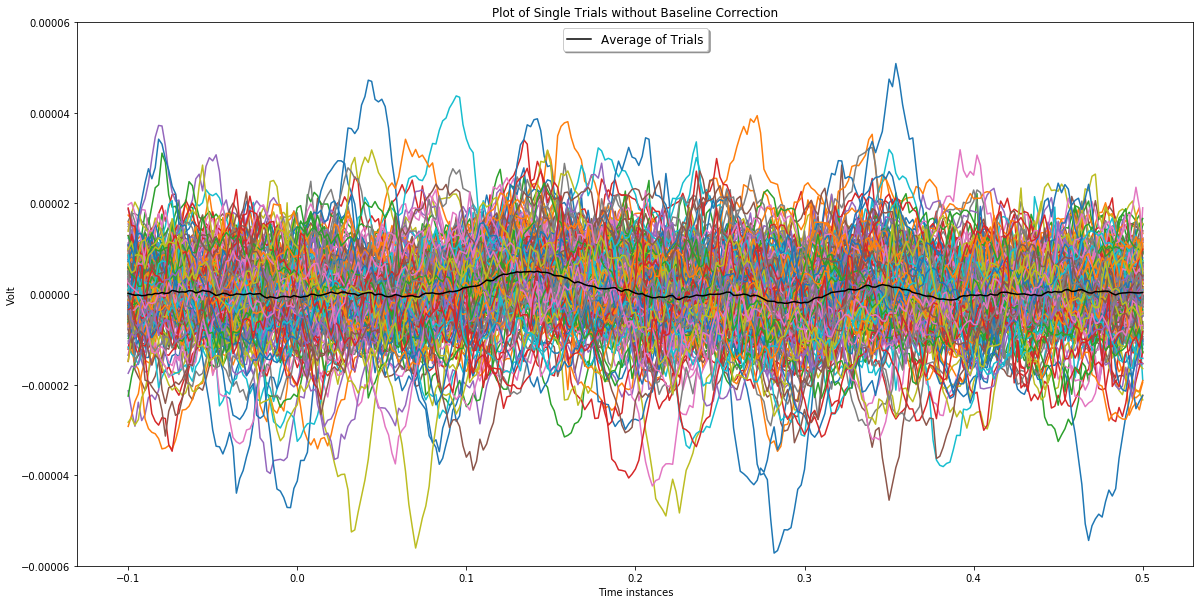

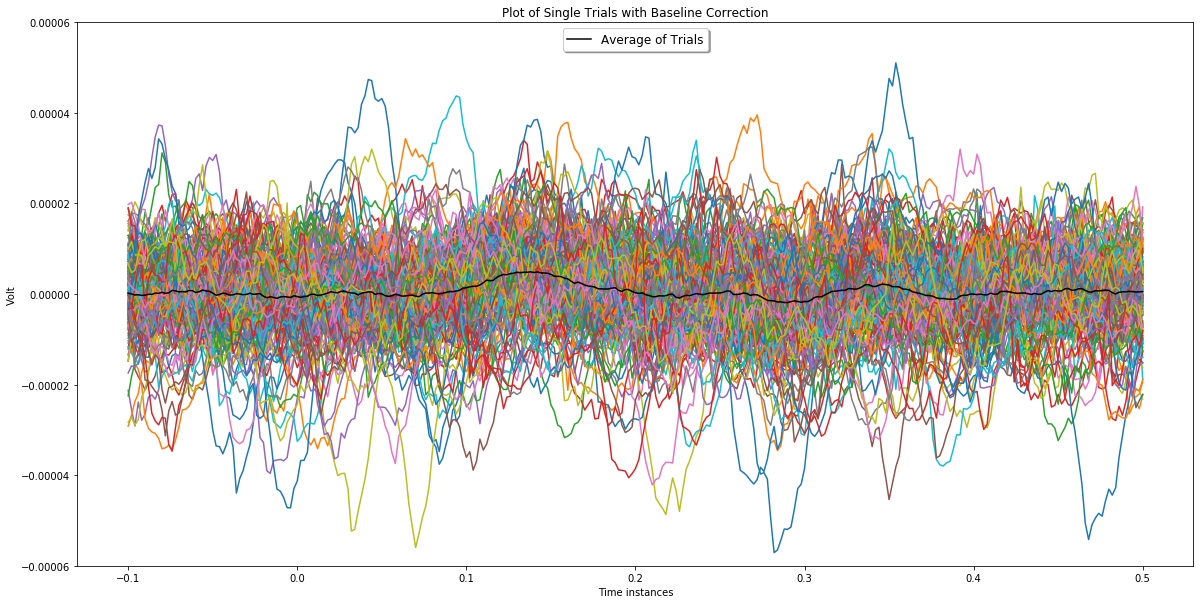

In [151]:
from matplotlib import pyplot as plt
%matplotlib inline
ch = 47 # channel index
data_types = ['original', 'bc']

for i in range(len(data_types)):

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlabel('Time instances')
    ax.set_ylabel('Volt')
    plt.ylim(-0.00006, 0.00006) 
    if data_types[i] == 'bc': 
        plt.title('Plot of Single Trials with Baseline Correction')
        for i in range(len(bc_epochs.get_data())):   
            ax.plot(epochs_for_bc.times, epochs_for_bc.get_data()[i,ch,:])
        ax.plot(epochs_for_bc.average().times, epochs_for_bc.average().data[ch,:], color='black', label='Average of Trials')
    
    else:
        plt.title('Plot of Single Trials without Baseline Correction')
        for i in range(len(epochs_wo_bc.get_data())):   
            ax.plot(epochs_wo_bc.times, epochs_wo_bc.get_data()[i,ch,:])
        ax.plot(epochs_wo_bc.average().times, epochs_wo_bc.average().data[ch,:], color='black', label='Average of Trials')

    legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
    plt.show()

In [152]:
epochs_for_bc.get_data()[60,47,:]

array([-7.65695943e-06, -1.01842802e-05, -1.46315471e-05, -1.35375801e-05,
       -1.26212130e-05, -1.39532769e-05, -1.39557557e-05, -1.11177895e-05,
       -6.69057208e-06, -5.16777756e-06, -5.58321270e-06, -9.90110561e-07,
        2.35815748e-07,  9.31521759e-07,  3.03089047e-06, -1.45484135e-06,
       -1.70524308e-06, -7.70893171e-07, -9.40330648e-07, -1.99772937e-06,
       -2.51952516e-06, -9.53769238e-07, -8.72099579e-07, -6.72086663e-07,
        3.32955330e-06, -1.61350617e-06, -4.42773894e-06, -1.09817670e-06,
        1.86720081e-06,  7.76298834e-06,  1.56674797e-05,  1.55785193e-05,
        8.21633830e-06,  1.04416312e-05,  1.00812585e-05,  1.00393407e-05,
        1.33324630e-05,  1.19685657e-05,  1.24539558e-05,  1.01186371e-05,
        1.11833772e-05,  1.32825405e-05,  1.54839198e-05,  1.36303365e-05,
        1.25725675e-05,  1.56945213e-05,  1.31096112e-05,  9.56099060e-06,
        1.16238675e-05,  9.66947927e-06,  6.85242755e-06,  5.16171431e-06,
        3.61921966e-06,  

In [153]:
epochs_wo_bc.get_data()[60,47,:]

array([-7.72239778e-06, -1.02455053e-05, -1.46844940e-05, -1.35783214e-05,
       -1.26772289e-05, -1.40215807e-05, -1.40060367e-05, -1.11836528e-05,
       -6.76982115e-06, -5.23256634e-06, -5.63264512e-06, -1.03917253e-06,
        2.04382613e-07,  9.19748304e-07,  2.98669600e-06, -1.51092660e-06,
       -1.74258875e-06, -8.14326225e-07, -9.66807959e-07, -2.03581905e-06,
       -2.59444951e-06, -1.01943457e-06, -9.36653135e-07, -7.41793869e-07,
        3.28503703e-06, -1.69232094e-06, -4.49291848e-06, -1.12878334e-06,
        1.84488487e-06,  7.76956175e-06,  1.56338510e-05,  1.55294590e-05,
        8.19048879e-06,  1.04256115e-05,  1.00876569e-05,  1.00513487e-05,
        1.33212595e-05,  1.19641933e-05,  1.24739303e-05,  1.01192493e-05,
        1.11535053e-05,  1.32215633e-05,  1.54681902e-05,  1.36376629e-05,
        1.25935173e-05,  1.57197733e-05,  1.31515617e-05,  9.61740491e-06,
        1.16761579e-05,  9.70114515e-06,  6.85700606e-06,  5.16949891e-06,
        3.60803913e-06,  